In [41]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [42]:
data = pd.read_csv('data/train.csv')

file = open('data/cualitativas.txt', 'r')
cualitativas = file.read().splitlines()
file = open('data/cuantitativas.txt', 'r')
cuantitativas = file.read().splitlines()

# Variables cualitativas
cualitativas = data[cualitativas]

# # Variables cuantitativas
cuantitativas = data[cuantitativas]

# Objetivo: Predecir los precios de las casas

## Analisis exploratorio

In [43]:

cuantitativas.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


LotFrontage : 
	Kurtosis: 17.375300497599614 
	Asimetría: 2.160865994705543 

LotArea : 
	Kurtosis: 202.5437927513529 
	Asimetría: 12.195142125084478 

YearBuilt : 
	Kurtosis: -0.44215484565294716 
	Asimetría: -0.612830724202899 

YearRemodAdd : 
	Kurtosis: -1.2719991404772555 
	Asimetría: -0.5030444967597948 

MasVnrArea : 
	Kurtosis: 10.04360232122905 
	Asimetría: 2.6663261001607435 

BsmtFinSF1 : 
	Kurtosis: 11.076089857631942 
	Asimetría: 1.6837708962341815 

BsmtFinSF2 : 
	Kurtosis: 20.04041549471293 
	Asimetría: 4.250888017057445 

BsmtUnfSF : 
	Kurtosis: 0.4692620789683075 
	Asimetría: 0.9193227015582005 

TotalBsmtSF : 
	Kurtosis: 13.201041630635025 
	Asimetría: 1.522688086978629 

1stFlrSF : 
	Kurtosis: 5.722076026587489 
	Asimetría: 1.3753417421837937 

2ndFlrSF : 
	Kurtosis: -0.5556767272864769 
	Asimetría: 0.8121942731961613 

LowQualFinSF : 
	Kurtosis: 82.945932358931 
	Asimetría: 9.002080417658552 

GrLivArea : 
	Kurtosis: 4.874265760253215 
	Asimetría: 1.365155954773434 

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


GarageCars : 
	Kurtosis: 0.2161348715110729 
	Asimetría: -0.34219689543081294 

GarageArea : 
	Kurtosis: 0.9098227950882034 
	Asimetría: 0.1797959420587727 

WoodDeckSF : 
	Kurtosis: 2.978604140391349 
	Asimetría: 1.5397916998042025 

OpenPorchSF : 
	Kurtosis: 8.457180405184337 
	Asimetría: 2.361911928568972 

EnclosedPorch : 
	Kurtosis: 10.39097160371135 
	Asimetría: 3.086696471376678 

3SsnPorch : 
	Kurtosis: 123.23517727268867 
	Asimetría: 10.293752357165413 

ScreenPorch : 
	Kurtosis: 18.371874098863685 
	Asimetría: 4.1179773827954875 

PoolArea : 
	Kurtosis: 222.500506832132 
	Asimetría: 14.813134660429398 

MiscVal : 
	Kurtosis: 698.6008400387273 
	Asimetría: 24.4516396173223 

MoSold : 
	Kurtosis: -0.40683350802995655 
	Asimetría: 0.2118350601903434 

YrSold : 
	Kurtosis: -1.1906338560829521 
	Asimetría: 0.096169579618143 



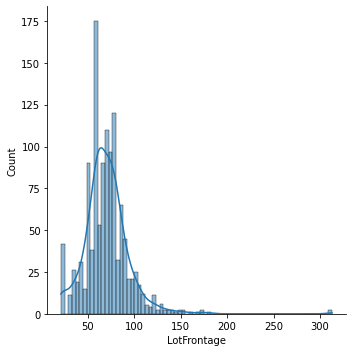

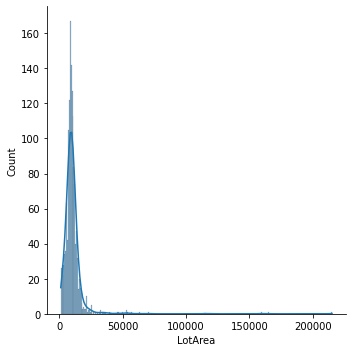

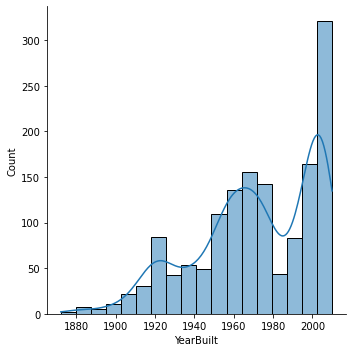

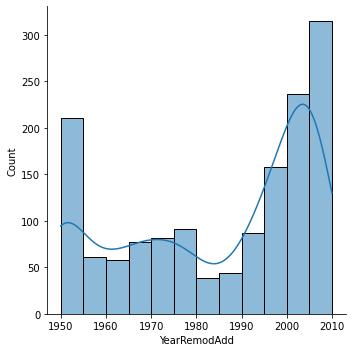

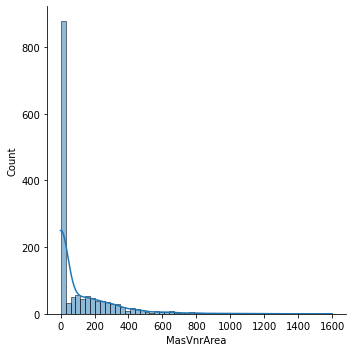

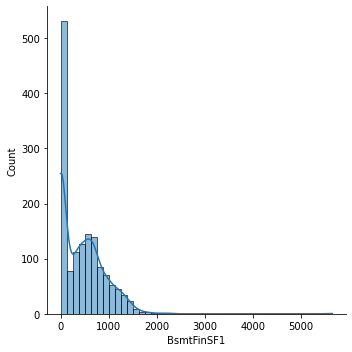

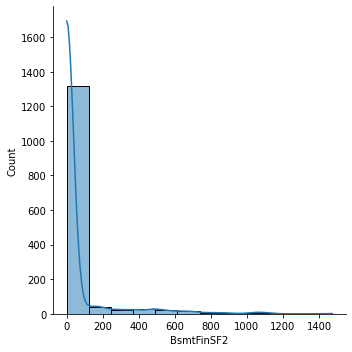

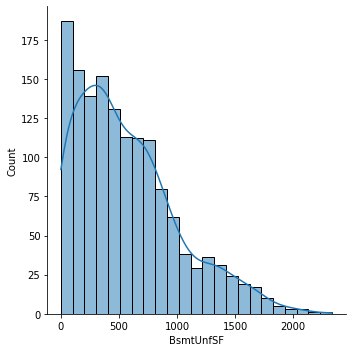

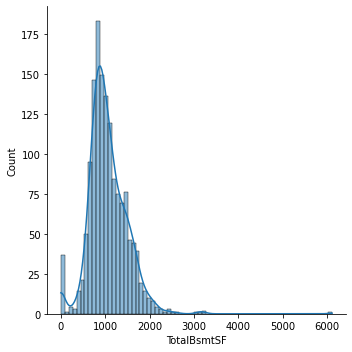

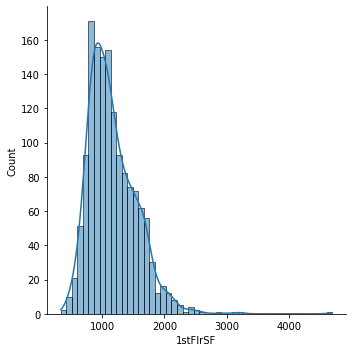

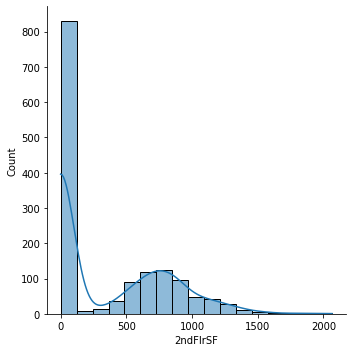

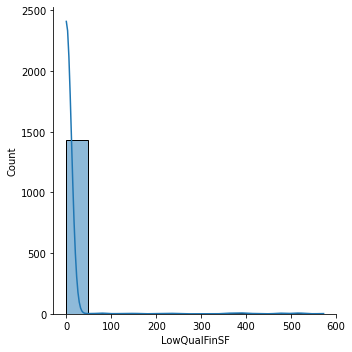

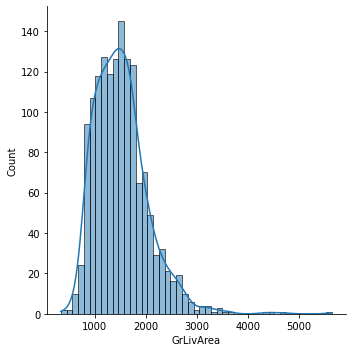

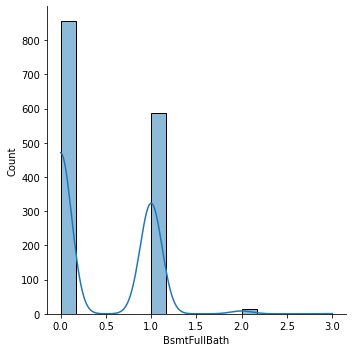

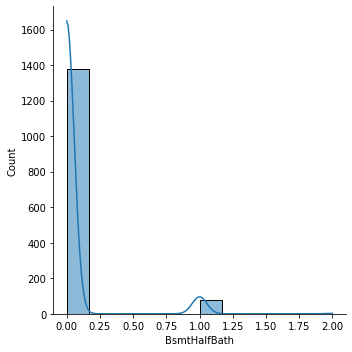

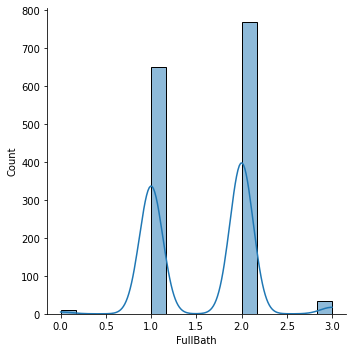

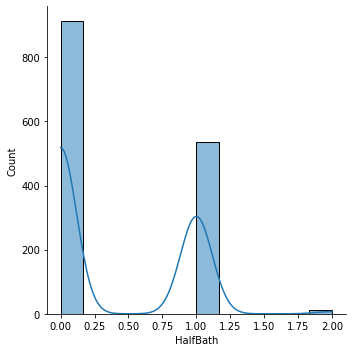

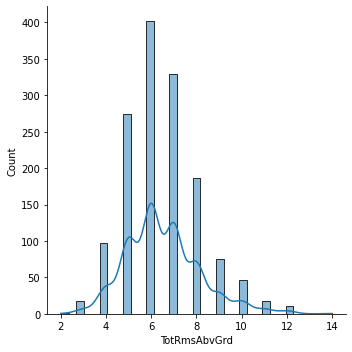

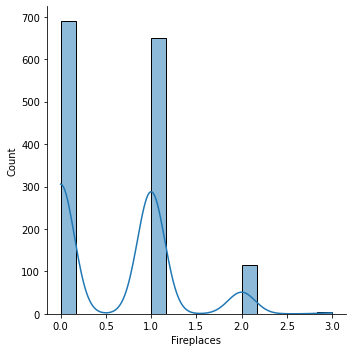

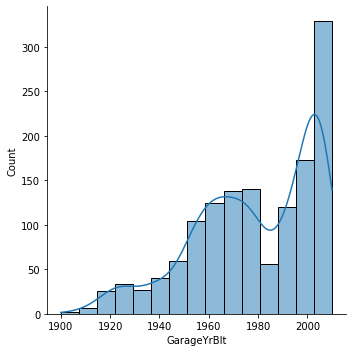

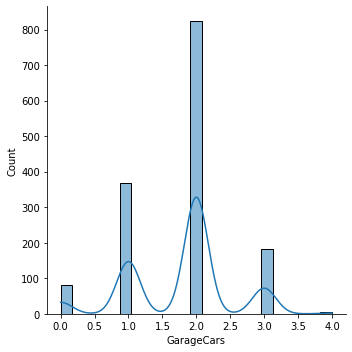

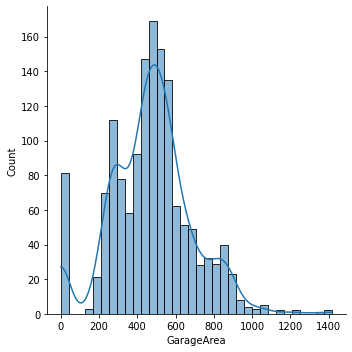

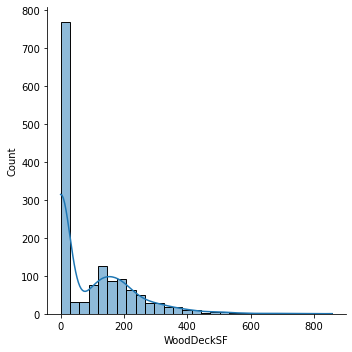

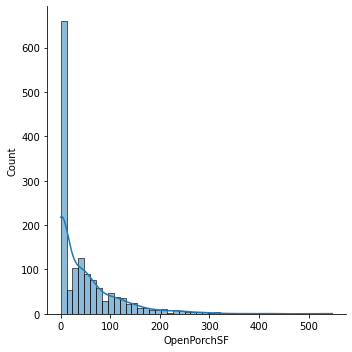

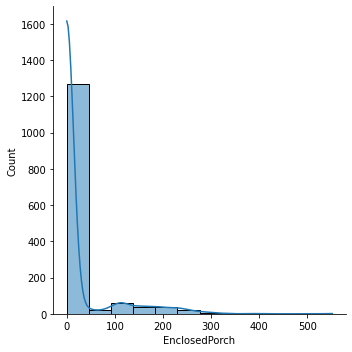

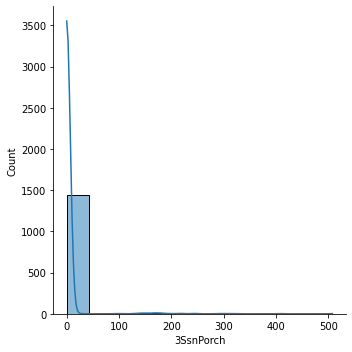

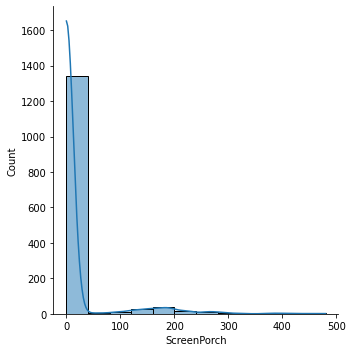

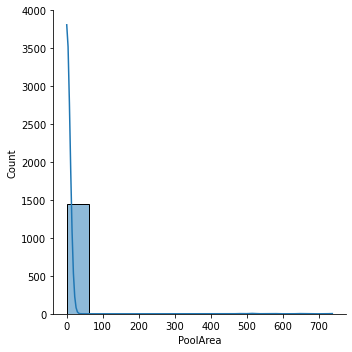

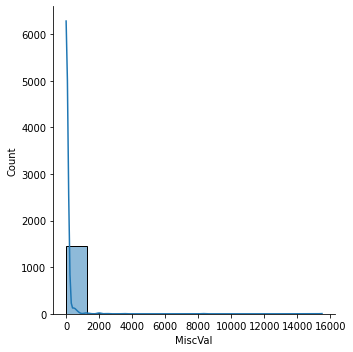

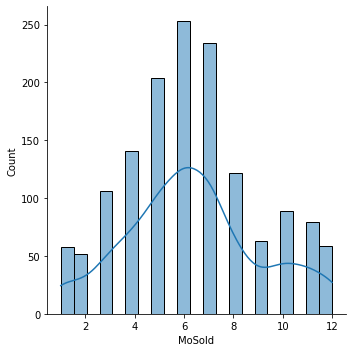

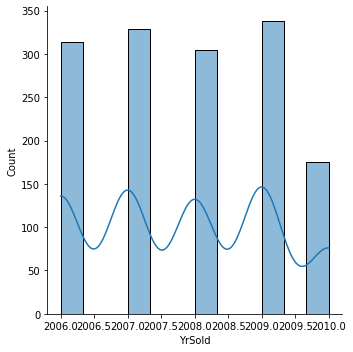

In [44]:
# plot value counts of all cualitative variables

for n in cuantitativas.columns:
    localData = cuantitativas[n].dropna(how='all', axis=0)
  
    sns.displot(localData, kde=True)

    print( n, ':', '\n\tKurtosis:', stats.kurtosis(localData), '\n\tAsimetría:', stats.skew(localData), '\n')

# cuantitativas.value_counts().dropna().plot(kind='bar', title='video')

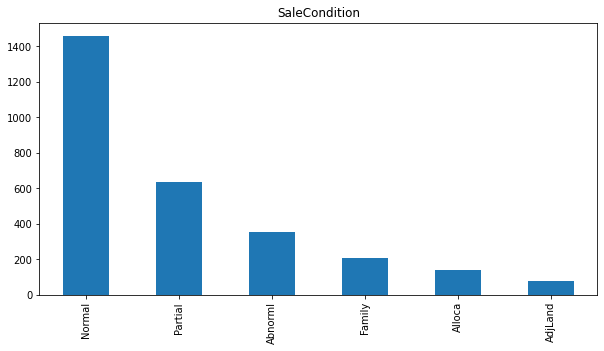

In [49]:
for n in cualitativas.columns:
    localData = cualitativas[n].dropna(how='all', axis=0)

    localData.value_counts().plot(kind='bar', title=n)

plt.show()

